# Geoprocesamiento II

In [43]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.speedups

In [44]:
import shapely
shapely.__version__

'1.8.2'

In [45]:
os.chdir(r"E:\Python\02_SIG_Python\Datos_Espacial")

In [46]:
# Read files
poly1 = gpd.read_file("Geoprocesamiento/POLIGONO1.shp")
poly2 = gpd.read_file("Geoprocesamiento/POLIGONO2.shp")
Distrito = gpd.read_file("Formato/SHP/Distrito_Ucayali.shp")

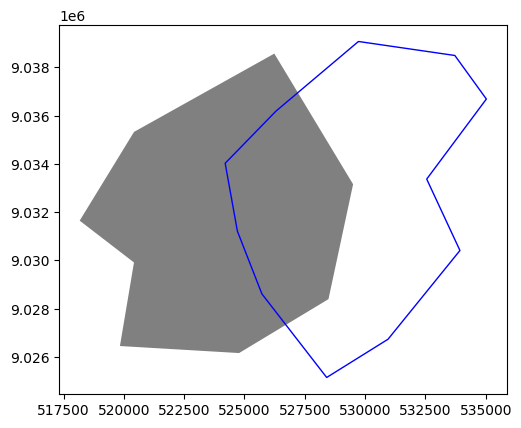

In [47]:
# Plot the layers
ax = poly1.plot(facecolor='gray')
poly2.plot(ax=ax, facecolor='None', edgecolor='blue')
plt.show()

In [48]:
# Check the crs of the municipality polygon
print(poly2.crs)

epsg:32718


In [51]:
# Ensure that the CRS matches, if not raise an AssertionError
assert poly2.crs == poly1.crs, "CRS differs between layers!"

## Interseccion

In [53]:
intersection = gpd.overlay(poly1, poly2, how='intersection')

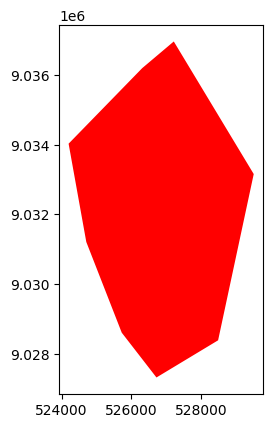

In [55]:
intersection.plot(color="red")
plt.show()

In [56]:
intersection.head(3)

,id_1,Nombre_1,id_2,Nombre_2,geometry
0,1,GEOMATICA,1,AMBIENTAL,"POLYGON ((529502.761 9033155.876, 528482.419 9..."


In [57]:
# Use GeoJSON driver
intersection.to_file("Resultado/Inteseccion.geojson", driver="GeoJSON")

In [59]:
list(intersection.columns)

['id_1', 'Nombre_1', 'id_2', 'Nombre_2', 'geometry']

## Disolver

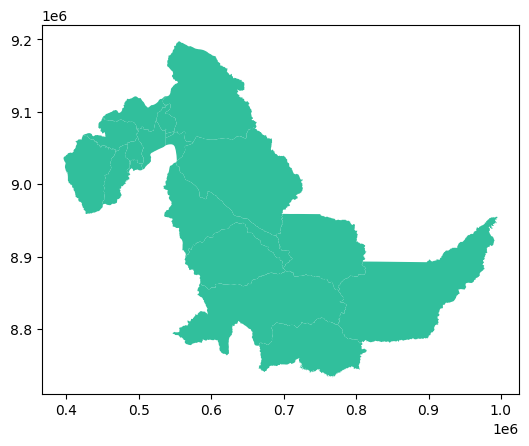

In [63]:
Distrito.plot(color="#31bf9c")
plt.show()

In [64]:
Distrito.head(3)

,OBJECTID,SHAPE_Leng,SHAPE_Area,ZONUTM,FUENTE,OBSERV,DOCREG,FECREG,ORIGEN,NOMDIS,NOMPRO,NOMDEP,LEYCRE,FECCRE,SUPSIG,UBIGEO,geometry
0,2.0,846966.904411,1.456490e+10,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250201,2502,25,LEY 6251,1928/10/22 00:00:00.000,1456490.000,250201,"POLYGON ((709089.500 8879380.000, 709388.125 8..."
1,3.0,430997.380855,7.659283e+09,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250203,2502,25,LEY 9815,1943/07/02 00:00:00.000,765928.250,250203,"POLYGON ((637909.956 8945148.739, 637913.399 8..."
2,4.0,866293.074394,1.845954e+10,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250401,2504,25,LEY 30720,2018/01/11 00:00:00.000,1845954.125,250401,"POLYGON ((993808.480 8955074.597, 993816.750 8..."


In [65]:
len(Distrito)

17

In [69]:
print(list(Distrito.columns))

['OBJECTID', 'SHAPE_Leng', 'SHAPE_Area', 'ZONUTM', 'FUENTE', 'OBSERV', 'DOCREG', 'FECREG', 'ORIGEN', 'NOMDIS', 'NOMPRO', 'NOMDEP', 'LEYCRE', 'FECCRE', 'SUPSIG', 'UBIGEO', 'geometry']


In [70]:
# Conduct the aggregation
provincia = Distrito.dissolve(by='NOMPRO')
departamento = Distrito.dissolve(by='NOMDEP')
# What did we get
provincia.head(3)

,geometry,OBJECTID,SHAPE_Leng,SHAPE_Area,ZONUTM,FUENTE,OBSERV,DOCREG,FECREG,ORIGEN,NOMDIS,NOMDEP,LEYCRE,FECCRE,SUPSIG,UBIGEO
NOMPRO,,,,,,,,,,,,,,,,
2501,"POLYGON ((689050.574 8929017.009, 689062.336 8...",7.0,143063.509660,6.599271e+08,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250107,25,LEY 28753,2006/06/06 00:00:00.000,6.597909e+04,250107
2502,"POLYGON ((775196.375 8805603.000, 775196.413 8...",2.0,846966.904411,1.456490e+10,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250201,25,LEY 6251,1928/10/22 00:00:00.000,1.456490e+06,250201
2503,"POLYGON ((486802.905 9016037.685, 486802.905 9...",13.0,85919.348494,2.086686e+08,18,Gobierno Regional Ucayali,None,Ley de creación,None,2,250305,25,LEY 30310,2015/03/17 00:00:00.000,2.086686e+04,250305


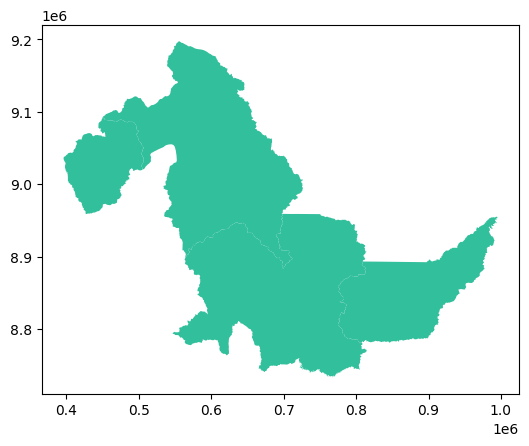

In [73]:
provincia.plot(color="#31bf9c")
plt.show()

In [74]:
print("Numero de poligonos distrito:" ,len(Distrito))
print("Numero de poligonos provincia:",len(provincia))

Numero de poligonos distrito: 17
Numero de poligonos provincia: 4


In [77]:
print(list(provincia.columns))

['geometry', 'OBJECTID', 'SHAPE_Leng', 'SHAPE_Area', 'ZONUTM', 'FUENTE', 'OBSERV', 'DOCREG', 'FECREG', 'ORIGEN', 'NOMDIS', 'NOMDEP', 'LEYCRE', 'FECCRE', 'SUPSIG', 'UBIGEO']


In [78]:
provincia.index

Index(['2501', '2502', '2503', '2504'], dtype='object', name='NOMPRO')

In [80]:
provincia.crs.name

'WGS 84 / UTM zone 18S'

In [87]:
# Create a GeoDataFrame
selection = gpd.GeoDataFrame([provincia.loc["2504"]], crs=provincia.crs)

<AxesSubplot: >

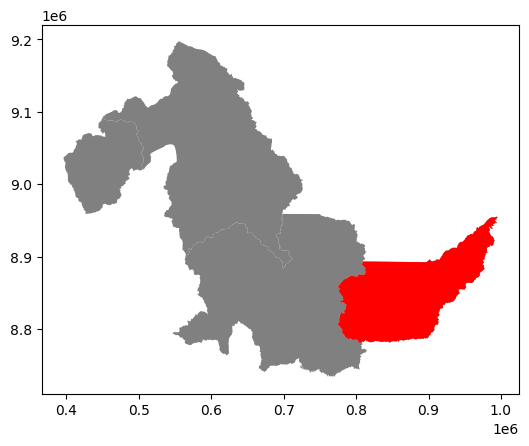

In [88]:
# Plot all the grid cells, and the grid cells that are 15 minutes a way from the Railway Station
ax = provincia.plot(facecolor='gray')
selection.plot(ax=ax, facecolor='red')

## Union

In [89]:
Union = gpd.overlay(poly1, poly2, how='union')

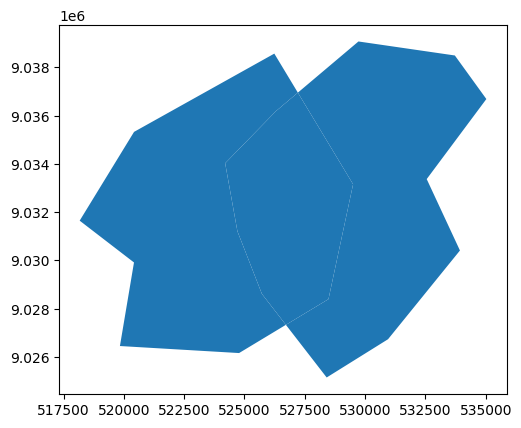

In [91]:
Union.plot()
plt.show()

In [92]:
len(Union)

3

In [93]:
Union.head()

,id_1,Nombre_1,id_2,Nombre_2,geometry
0,1.0,GEOMATICA,1.0,AMBIENTAL,"POLYGON ((529502.761 9033155.876, 528482.419 9..."
1,1.0,GEOMATICA,NaN,NaN,"POLYGON ((520422.957 9035326.550, 526237.059 9..."
2,NaN,NaN,1.0,AMBIENTAL,"POLYGON ((533720.637 9038493.747, 535026.941 9..."


In [94]:
# Conduct the aggregation
Union_disuelto = Union.dissolve(by=None)

<AxesSubplot: >

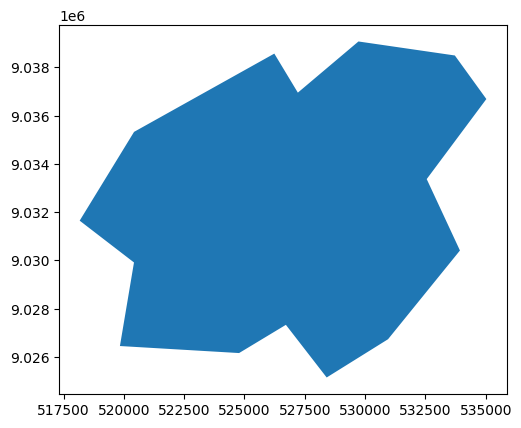

In [95]:
Union_disuelto.plot()

In [96]:
len(Union_disuelto)

1

## Diferencia simetrica

In [97]:
Diferencia_simetrica = gpd.overlay(poly1, poly2, how='symmetric_difference')

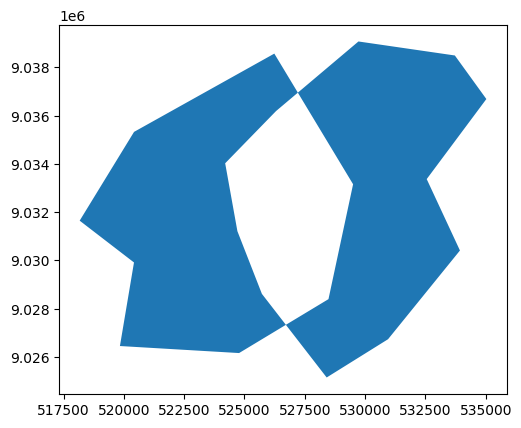

In [99]:
Diferencia_simetrica.plot()
plt.show()

In [100]:
len(Diferencia_simetrica)

2

## Diferencia

In [107]:
Diferencia_poly1 = gpd.overlay(poly1, poly2, how='difference')

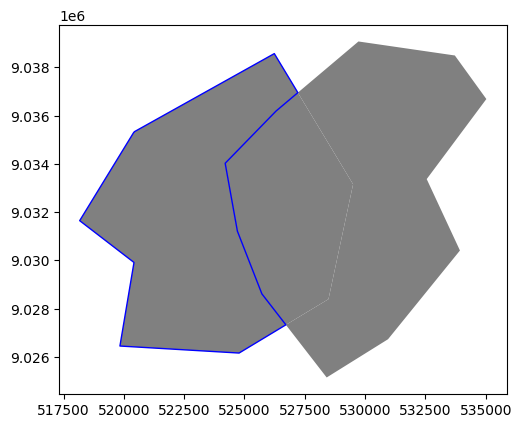

In [108]:
ax = Union.plot(facecolor='gray')
Diferencia_poly1.plot(ax=ax, facecolor='None', edgecolor='blue')
plt.show()

## Identidad

In [115]:
Identidad_poly2 = gpd.overlay(poly2, poly1, how='identity')

In [116]:
len(Identidad_poly2)

2

In [117]:
Identidad_poly2.head()

,id_1,Nombre_1,id_2,Nombre_2,geometry
0,1.0,AMBIENTAL,1.0,GEOMATICA,"POLYGON ((525722.284 9028611.814, 524706.893 9..."
1,1.0,AMBIENTAL,NaN,NaN,"POLYGON ((533720.637 9038493.747, 535026.941 9..."


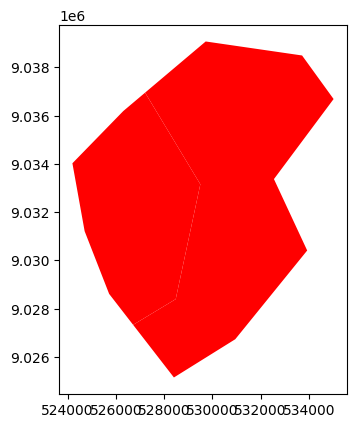

In [118]:
Identidad_poly2.plot(color="red")
plt.show()

In [119]:
# Save to disk
Identidad_poly2.to_file("Resultado/Identidad_poly2")